In [17]:
# Just some imports first as always
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt

In [18]:
np.random.seed(3) # This just makes sure everyone has the same "random" samples

In [19]:
# This is the same helper plotting function for 2D distributions used before
def SimpleColorPlotFromFunc( 
    Func2D = None,
    xmin = None,
    xmax = None, 
    ymin = None,
    ymax = None, 
    ):

    #Make the list of poitns to plug in from the boundaries:
    x = np.linspace(xmin, xmax, 100)
    y = np.linspace(ymin, ymax, 100)
    X, Y = np.meshgrid(x, y)
    PointsToPlugIn = np.vstack([X.ravel(), Y.ravel()])
    PointsToPlugInDataset = PointsToPlugIn.T


    #plug in the list of points:
    FunctionResultValuesForGrid = []
    for Point in PointsToPlugInDataset:
        Value = Func2D(Point)
        FunctionResultValuesForGrid.append(Value)

    #reshape stuff in a confusing way so matplotlib can think of the data like a matrix
    Z = np.reshape(FunctionResultValuesForGrid, X.shape).T


    #Actually construct the figure...
    plt.figure()
    heatmap = plt.imshow( 
        np.rot90(Z), 
        extent=[xmin, xmax, ymin, ymax] ,
        aspect = 'auto' ,
        interpolation = None,
        )  
    

# Defining our distribution
We define an underlying model (in this case a 2D Gaussian distribution) and then take a large number of samples from it to represent an "observed" vs. "model" distribution. First we Define the underlying distribution:

Text(0.5, 0, 'A')

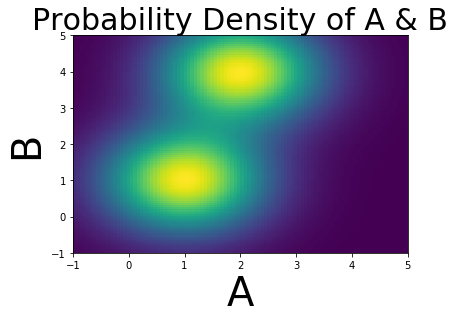

In [20]:
# We want to make a 2D Gaussian defined by the sum of 2 2D Gaussian distributions.
# As we saw, each 2D Gaussian needs a mean in each dimension and a covariance matrix.
Gaussian1Mean = [1,1]
Gaussian2Mean = [2,4]

Gaussian1Covariance = np.identity(2)*1
Gaussian2Covariance = np.identity(2)*1

# Like in the introduction, we now have a function for each Gaussian that accepts a point (A,B),
# and returns the result of the Gaussian defined by the parameters above. 
def Gaussian1(ABpoint):
    return scipy.stats.multivariate_normal.pdf( ABpoint, mean = Gaussian1Mean, 
                                               cov = Gaussian1Covariance )

def Gaussian2(ABpoint):
    return scipy.stats.multivariate_normal.pdf( ABpoint, mean = Gaussian2Mean, 
                                               cov = Gaussian2Covariance )

# And finally we define our final distribution, which is the sum of our other two Gaussian
# distributions
def GaussianMultiModal(ABpoint):
    return Gaussian1(ABpoint) + Gaussian2(ABpoint)

# Use our helper to plot what we get.
SimpleColorPlotFromFunc( 
    Func2D = GaussianMultiModal,
    xmin = -1,
    xmax = 5, 
    ymin = -1,
    ymax = 5, 
    )
plt.title("Probability Density of A & B", fontsize=30)
plt.ylabel('B',fontsize=40)
plt.xlabel('A',fontsize=40)

Notice that what we get now is a 2D distribution with 2 clear peaks. Consider a case where this is the probability density you observe for some measurement you're making. This means there are two regions of parameter space that have a high probability of occurring. Or if we pretend this is a measured "posterior" distribution after fitting for two parameters, we can see that there are two regions of parameter space that have an equal probability of being the "truth". It's important when fitting for parameters or measuring underlying distributions that we don't simply attempt to find the most probable solution, but also know what this full picture looks like. We will discuss this while learning fitting with MCMC. 

## Assume that the samples generated below are representative of the distribution

Combined shape: (20000, 2)


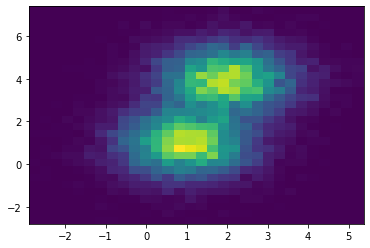

In [16]:
# We can create 10k samples from these underlying distributions by simply asking for 10k samples
# using the same parameters that define the Gaussian distributions.
DataSamples1 = np.random.multivariate_normal(Gaussian1Mean,Gaussian1Covariance,size=10000)
DataSamples2 = np.random.multivariate_normal(Gaussian2Mean,Gaussian2Covariance,size=10000)

CombinedSamples = np.vstack([DataSamples1,DataSamples2]) # We don't need a transpose here
                                                         # because of the shape of the array
                                                         # returned by the multivariate_normal
                                                         # function (see the print statement)
print('Combined shape:',CombinedSamples.shape)
np.random.shuffle(CombinedSamples) # This just shuffles the samples around 
# Let's plot this, and note that it looks like a pixelated version
# of the 2D plot above. This shows that it's a dataset from the same
# underlying distribution, but just a smaller number of datapoints. 
_=plt.hist2d(CombinedSamples[:,0],CombinedSamples[:,1],bins=30) 

# We can define these same Adata and Bdata as we did in the introduction notebook
Adata = CombinedSamples[:,0]
Bdata = CombinedSamples[:,1]


# Find & plot the conditional probability P(B | A = 1,1.5,2)
Using the probability theory reference notebook, find and plot each conditional probability of A, given B=1, then 1.5, then 2. 

# Find & plot the marginal probability of A
Using the samples provided above (`CombinedSamples`), find and plot a histogram showing the marginal probability of A. Then add a best-fit Gaussian on top of your histogram.

# Find & plot the marginal probability of B
Using the samples provided above (`CombinedSamples`), find and plot a histogram showing the marginal probability of A. Then add a best-fit Gaussian on top of your histogram.